In [1]:
from matplotlib import pyplot as plt
from numpy.polynomial.hermite import Hermite
from math import factorial
from qutip import *
import numpy as np
from scipy import *
import imageio
from tqdm import tqdm
import os
from os.path import exists

In [2]:
#DEFINICIÓN DE FUNCIONES

def FuncionesOscilador(N,n,x):
    h=zeros(N)
    h[n]=1
    c=(1/sqrt(2**(n)*factorial(n)))*pow(1/np.pi,0.25)
    return c*exp(-0.5*x**2)*Hermite(h)(x)

def gellmann():
    matrices=[]
    sigma_1 = 0.5*np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
    matrices.append(sigma_1)
    
    sigma_2 = 0.5*np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]])
    matrices.append(sigma_2)
    
    sigma_3 = 0.5*np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
    matrices.append(sigma_3)
    
    sigma_4 = 0.5*np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]]) 
    matrices.append(sigma_4)
    
    sigma_5 = 0.5*np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]])
    matrices.append(sigma_5)
    
    sigma_6 = 0.5*np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
    matrices.append(sigma_6)
    
    sigma_7 = 0.5*np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]])
    matrices.append(sigma_7)
    
    sigma_8 = 0.5*(1/np.sqrt(3)) * np.array([[1, 0, 0], [0, 1, 0], [0, 0, -2]])
    matrices.append(sigma_8)
    
    return matrices

In [3]:
#Número de polinomios de Hermite 
Nc=5

#Spin y dimensión de cada subespacio cuántico
S=1
Nq=int(2*S+1)

#Operadores identidad
Ic=qeye(Nc)
Iq=qeye(Nq)

In [4]:
#Definición de coordenadas y momentos clásicos
a = np.zeros((Nc,Nc)) #Operador destrucción
aa = np.zeros((Nc,Nc)) #Operador creación
for i in range(Nc-1):
    a[i][i+1]=math.sqrt(i+1)
    aa[i+1][i]=math.sqrt(i+1)

aaq=tensor(Qobj(aa),Ic)
aap=tensor(Ic,Qobj(aa))
aq=tensor(Qobj(a),Ic)
ap=tensor(Ic,Qobj(a))

q=1/np.sqrt(2)*(aq+aaq)
piq=-1j*1/np.sqrt(2)*(aaq-aq)
p=1/np.sqrt(2)*(ap+aap)
pip=-1j*1/np.sqrt(2)*(aap-ap)

In [5]:
#Momento angular cuántico

S2q=S*(S+1)*qeye(Nq)
mz=np.zeros(Nq)
for j in range(Nq):
    mz[j]=-S+j

Sp_aux=zeros((Nq,Nq))
Sm_aux=zeros((Nq,Nq))
Sz_aux=zeros((Nq,Nq))

for k in range(Nq):
    if k!=Nq-1:
        Sm_aux[k][k+1]=np.sqrt(S*(S+1)-mz[k+1]*(mz[k+1]-1))
        Sp_aux[k+1][k]=np.sqrt(S*(S+1)-mz[k]*(mz[k]+1))
    Sz_aux[k][k]=mz[k]
    
Sp=Qobj(Sp_aux)
Sm=Qobj(Sm_aux)
Sz=Qobj(Sz_aux)
Sx=1/2*(Sm+Sp)
Sy=1/2/1j*(Sm-Sp)

S2=tensor(S2q,Iq)+tensor(Iq,S2q)+2*tensor(Sz,Sz)+tensor(Sp,Sm)+tensor(Sm,Sp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13160\2543777181.py:8: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Sp_aux=zeros((Nq,Nq))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13160\2543777181.py:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Sm_aux=zeros((Nq,Nq))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13160\2543777181.py:10: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Sz_aux=zeros((Nq,Nq))


In [6]:
#Hamiltoniano
Hc=-1j/2*((aq+aaq)*(ap-aap)-(ap+aap)*(aq-aaq))
Hq=tensor(Sx,Iq)+tensor(Iq,Sx)
Hcq=tensor((aaq+aq),tensor(Sz,Iq)+tensor(Iq,Sz))

H=tensor(Hc,Iq,Iq)
#H=tensor(Hc,Iq,Iq)+tensor(Ic,Ic,Hq)+Hcq

#Operadores de Krauss
V0c=q+piq-pip

V0=tensor(V0c,S2)

In [7]:
#PARTE CLÁSICA
ϕc=tensor(basis(Nc,0),basis(Nc,1))

#PARTE CUÁNTICA
#Singlete
ϕsq=tensor(basis(Nq,2),basis(Nq,0))-tensor(basis(Nq,1),basis(Nq,1))+tensor(basis(Nq,0),basis(Nq,2))

#Triplete
ϕtq=tensor(basis(Nq,2),basis(Nq,0))-tensor(basis(Nq,0),basis(Nq,2))

#Quintuplete
ϕqq=tensor(basis(Nq,2),basis(Nq,2))

#Total
ϕs=(tensor(ϕc,ϕsq)).unit()
ϕt=(tensor(ϕc,ϕtq)).unit()
ϕq=(tensor(ϕc,ϕqq)).unit()

ρs=ϕs*ϕs.dag()
ρt=ϕt*ϕt.dag()
ρq=ϕq*ϕq.dag()
ρc=ϕc*ϕc.dag()

In [9]:
#Simulaciones
T=0.05 #Tiempo de simulación
pasos=30 #Número de pasos temporales
time=linspace(0,T,pasos)

#Evolución híbrida unitaria
EvolucionUnitariaSinglete=mesolve(H,ρs,time,progress_bar=True,options=Options(nsteps=500000))
EvolucionUnitariaTriplete=mesolve(H,ρt,time,progress_bar=True,options=Options(nsteps=500000))
EvolucionUnitariaQuintuplete=mesolve(H,ρq,time,progress_bar=True,options=Options(nsteps=500000))

#Evolución híbrida Lindbladiana
EvolucionLindbladianaSinglete=mesolve(H,ρs,time,c_ops=[V0],progress_bar=True,options=Options(nsteps=500000))
EvolucionLindbladianaTriplete=mesolve(H,ρt,time,c_ops=[V0],progress_bar=True,options=Options(nsteps=500000))
EvolucionLindbladianaQuintuplete=mesolve(H,ρq,time,c_ops=[V0],progress_bar=True,options=Options(nsteps=500000))

#Evolución clásica Linbladiana
EvolucionClasica=mesolve(Hc,ρc,time,c_ops=[V0c],progress_bar=True)

10.0%. Run time:   0.04s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   0.05s. Est. time left: 00:00:00:00
40.0%. Run time:   0.07s. Est. time left: 00:00:00:00
50.0%. Run time:   0.07s. Est. time left: 00:00:00:00
60.0%. Run time:   0.08s. Est. time left: 00:00:00:00
70.0%. Run time:   0.09s. Est. time left: 00:00:00:00
80.0%. Run time:   0.10s. Est. time left: 00:00:00:00
90.0%. Run time:   0.11s. Est. time left: 00:00:00:00
Total run time:   0.12s
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13160\2617005181.py:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time=linspace(0,T,pasos)


20.0%. Run time:   0.04s. Est. time left: 00:00:00:00
30.0%. Run time:   0.04s. Est. time left: 00:00:00:00
40.0%. Run time:   0.06s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.07s. Est. time left: 00:00:00:00
70.0%. Run time:   0.08s. Est. time left: 00:00:00:00
80.0%. Run time:   0.09s. Est. time left: 00:00:00:00
90.0%. Run time:   0.09s. Est. time left: 00:00:00:00
Total run time:   0.11s
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.03s. Est. time left: 00:00:00:00
30.0%. Run time:   0.04s. Est. time left: 00:00:00:00
40.0%. Run time:   0.05s. Est. time left: 00:00:00:00
50.0%. Run time:   0.06s. Est. time left: 00:00:00:00
60.0%. Run time:   0.06s. Est. time left: 00:00:00:00
70.0%. Run time:   0.07s. Est. time left: 00:00:00:00
80.0%. Run time:   0.08s. Est. time left: 00:00:00:00
90.0%. Run time:   0.09s. Est. time left: 00:00:00:00
Total run time:   0.09s
10.0%. Run time:   0.08s. Est. tim

In [10]:
#Evolución híbrida Lindbladiana para el singlete
#Matrices
EstadosLindbladianaSinglete=[EvolucionLindbladianaSinglete.states[t] for t in range(len(time))]
ρcLindbladianaSinglete=[EstadosLindbladianaSinglete[i].ptrace([0,1]) for i in range(len(time))]
ρ2cLindbladianaSinglete=[ρcLindbladianaSinglete[i]*ρcLindbladianaSinglete[i] for i in range(len(time))]
ρq1LindbladianaSinglete=[EstadosLindbladianaSinglete[i].ptrace([2]) for i in range(len(time))]
ρq2LindbladianaSinglete=[EstadosLindbladianaSinglete[i].ptrace([3]) for i in range(len(time))]
#Trazas
TrazaLindbladianaSinglete=[(EstadosLindbladianaSinglete[i].ptrace([2,3])).tr() for i in range(len(time))]
ρcTrazaLindbladianaSinglete=[ρcLindbladianaSinglete[t].full().trace() for t in range(len(time))]
ρ2cTrazaLindbladianaSinglete=[ρ2cLindbladianaSinglete[t].full().trace() for t in range(len(time))]
#Entropías
EntropiaLindbladianaSinglete=[entropy_vn(rho, base=np.e, sparse=False) for rho in ρcLindbladianaSinglete]

In [11]:
#Evolución híbrida Lindbladiana para el triplete
#Matrices
EstadosLindbladianaTriplete=[EvolucionLindbladianaTriplete.states[t] for t in range(len(time))]
ρcLindbladianaTriplete=[EstadosLindbladianaTriplete[i].ptrace([0,1]) for i in range(len(time))]
ρ2cLindbladianaTriplete=[ρcLindbladianaTriplete[i]*ρcLindbladianaTriplete[i] for i in range(len(time))]
ρq1LindbladianaTriplete=[EstadosLindbladianaTriplete[i].ptrace([2]) for i in range(len(time))]
ρq2LindbladianaTriplete=[EstadosLindbladianaTriplete[i].ptrace([3]) for i in range(len(time))]
#Trazas
TrazaLindbladianaTriplete=[(EstadosLindbladianaTriplete[i].ptrace([2,3])).tr() for i in range(len(time))]
ρcTrazaLindbladianaTriplete=[ρcLindbladianaTriplete[t].full().trace() for t in range(len(time))]
ρ2cTrazaLindbladianaTriplete=[ρ2cLindbladianaTriplete[t].full().trace() for t in range(len(time))]
#Entropías
EntropiaLindbladianaTriplete=[entropy_vn(rho, base=np.e, sparse=False) for rho in ρcLindbladianaTriplete]

In [12]:
#Evolución híbrida Lindbladiana para el quintuplete
#Matrices
EstadosLindbladianaQuintuplete=[EvolucionLindbladianaQuintuplete.states[t] for t in range(len(time))]
ρcLindbladianaQuintuplete=[EstadosLindbladianaQuintuplete[i].ptrace([0,1]) for i in range(len(time))]
ρ2cLindbladianaQuintuplete=[ρcLindbladianaQuintuplete[i]*ρcLindbladianaQuintuplete[i] for i in range(len(time))]
ρq1LindbladianaQuintuplete=[EstadosLindbladianaQuintuplete[i].ptrace([2]) for i in range(len(time))]
ρq2LindbladianaQuintuplete=[EstadosLindbladianaQuintuplete[i].ptrace([3]) for i in range(len(time))]
#Trazas
TrazaLindbladianaQuintuplete=[(EstadosLindbladianaQuintuplete[i].ptrace([2,3])).tr() for i in range(len(time))]
ρcTrazaLindbladianaQuintuplete=[ρcLindbladianaQuintuplete[t].full().trace() for t in range(len(time))]
ρ2cTrazaLindbladianaQuintuplete=[ρ2cLindbladianaQuintuplete[t].full().trace() for t in range(len(time))]
#Entropías
EntropiaLindbladianaQuintuplete=[entropy_vn(rho, base=np.e, sparse=False) for rho in ρcLindbladianaQuintuplete]

In [13]:
#Evolución híbrida unitaria para el singlete
#Matrices
EstadosUnitariaSinglete=[EvolucionUnitariaSinglete.states[t] for t in range(len(time))]
ρcUnitariaSinglete=[EstadosUnitariaSinglete[i].ptrace([0,1]) for i in range(len(time))]
ρ2cUnitariaSinglete=[ρcUnitariaSinglete[i]*ρcUnitariaSinglete[i] for i in range(len(time))]
ρq1UnitariaSinglete=[EstadosUnitariaSinglete[i].ptrace([2]) for i in range(len(time))]
ρq2UnitariaSinglete=[EstadosUnitariaSinglete[i].ptrace([3]) for i in range(len(time))]
#Trazas
TrazaUnitariaSinglete=[(EstadosUnitariaSinglete[i].ptrace([2,3])).tr() for i in range(len(time))]
ρcTrazaUnitariaSinglete=[ρcUnitariaSinglete[t].full().trace() for t in range(len(time))]
ρ2cTrazaUnitariaSinglete=[ρ2cUnitariaSinglete[t].full().trace() for t in range(len(time))]
#Entropías
EntropiaUnitariaSinglete=[entropy_vn(rho, base=np.e, sparse=False) for rho in ρcUnitariaSinglete]


In [14]:
#Evolución clásica unitaria para el triplete
#Matrices
EstadosUnitariaTriplete=[EvolucionUnitariaTriplete.states[t] for t in range(len(time))]
ρcUnitariaTriplete=[EstadosUnitariaTriplete[i].ptrace([0,1]) for i in range(len(time))]
ρ2cUnitariaTriplete=[ρcUnitariaTriplete[i]*ρcUnitariaTriplete[i] for i in range(len(time))]
ρq1UnitariaTriplete=[EstadosUnitariaTriplete[i].ptrace([2]) for i in range(len(time))]
ρq2UnitariaTriplete=[EstadosUnitariaTriplete[i].ptrace([3]) for i in range(len(time))]
#Trazas
TrazaUnitariaTriplete=[(EstadosUnitariaTriplete[i].ptrace([2,3])).tr() for i in range(len(time))]
ρcTrazaUnitariaTriplete=[ρcUnitariaTriplete[t].full().trace() for t in range(len(time))]
ρ2cTrazaUnitariaTriplete=[ρ2cUnitariaTriplete[t].full().trace() for t in range(len(time))]
#Entropías
EntropiaUnitariaTriplete=[entropy_vn(rho, base=np.e, sparse=False) for rho in ρcUnitariaTriplete]

In [15]:
#Evolución clásica unitaria para el quintuplete
#Matrices
EstadosUnitariaQuintuplete=[EvolucionUnitariaQuintuplete.states[t] for t in range(len(time))]
ρcUnitariaQuintuplete=[EstadosUnitariaQuintuplete[i].ptrace([0,1]) for i in range(len(time))]
ρ2cUnitariaQuintuplete=[ρcUnitariaQuintuplete[i]*ρcUnitariaQuintuplete[i] for i in range(len(time))]
ρq1UnitariaQuintuplete=[EstadosUnitariaQuintuplete[i].ptrace([2]) for i in range(len(time))]
ρq2UnitariaQuintuplete=[EstadosUnitariaQuintuplete[i].ptrace([3]) for i in range(len(time))]
#Trazas
TrazaUnitariaQuintuplete=[(EstadosUnitariaQuintuplete[i].ptrace([2,3])).tr() for i in range(len(time))]
ρcTrazaUnitariaQuintuplete=[ρcUnitariaQuintuplete[t].full().trace() for t in range(len(time))]
ρ2cTrazaUnitariaQuintuplete=[ρ2cUnitariaQuintuplete[t].full().trace() for t in range(len(time))]
#Entropías
EntropiaUnitariaQuintuplete=[entropy_vn(rho, base=np.e, sparse=False) for rho in ρcUnitariaQuintuplete]

In [16]:
#Evolución clásica Lindbladiana
#Matrices
EstadosClasica=[EvolucionClasica.states[t] for t in range(len(time))]
Estados2Clasica=[EstadosClasica[i]*EstadosClasica[i] for i in range(len(time))]
#Trazas
TrazaClasica=[(EstadosClasica[i]).tr() for i in range(len(time))]
Traza2Clasica=[(Estados2Clasica[i]).tr() for i in range(len(time))]
#Entropías
EntropiaClasica=[entropy_vn(rho, base=np.e, sparse=False) for rho in EstadosClasica]

C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1

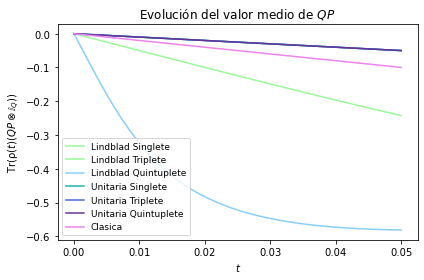

In [18]:
#Valor medio de los operadores

A=tensor(q*p,Iq,Iq)
Ac=q*p

ALindbladianaSinglete=np.zeros(len(time),dtype=complex)
AUnitariaSinglete=np.zeros(len(time),dtype=complex)
ALindbladianaTriplete=np.zeros(len(time),dtype=complex)
AUnitariaTriplete=np.zeros(len(time),dtype=complex)
ALindbladianaQuintuplete=np.zeros(len(time),dtype=complex)
AUnitariaQuintuplete=np.zeros(len(time),dtype=complex)
AClasica=np.zeros(len(time),dtype=complex)



for t in range(len(time)):
    ALindbladianaSinglete[t]=((EstadosLindbladianaSinglete[t]*A).ptrace([0,1])).tr()
    AUnitariaSinglete[t]=((EstadosUnitariaSinglete[t]*A).ptrace([0,1])).tr()
    ALindbladianaTriplete[t]=((EstadosLindbladianaTriplete[t]*A).ptrace([0,1])).tr()
    AUnitariaTriplete[t]=((EstadosUnitariaTriplete[t]*A).ptrace([0,1])).tr()
    ALindbladianaQuintuplete[t]=((EstadosLindbladianaQuintuplete[t]*A).ptrace([0,1])).tr()
    AUnitariaQuintuplete[t]=((EstadosUnitariaQuintuplete[t]*A).ptrace([0,1])).tr()
    AClasica[t]=((EstadosClasica[t]*Ac)).tr()


fig, ax = plt.subplots()


ax.plot(time,ALindbladianaSinglete,color='palegreen',label='Lindblad Singlete')
ax.plot(time,ALindbladianaTriplete,color='palegreen',label='Lindblad Triplete')
ax.plot(time,ALindbladianaQuintuplete,color='lightskyblue',label='Lindblad Quintuplete')

ax.plot(time,AUnitariaSinglete,color='lightseagreen',label='Unitaria Singlete')
ax.plot(time,AUnitariaTriplete,color='royalblue',label='Unitaria Triplete')
ax.plot(time,AUnitariaQuintuplete,color='rebeccapurple',label='Unitaria Quintuplete')


ax.plot(time,AClasica,color='violet',label='Clasica')

ax.set_xlabel('$t$')
ax.set_ylabel(r"Tr(ρ$(t)(QP\otimes\mathbb{I}_Q)$)")
ax.set_title(r"Evolución del valor medio de $ QP$")
ax.legend(loc='lower left',ncol=1,fontsize=9)
plt.tight_layout()

#plt.savefig("./Graficas/QP")
plt.show()


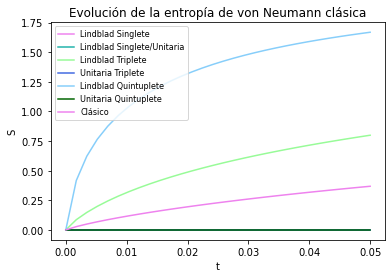

In [19]:
#Entropía clásica

fig, ax = plt.subplots()

ax.plot(time,EntropiaLindbladianaSinglete,label="Lindblad Singlete",color='violet')
ax.plot(time,EntropiaUnitariaSinglete,label="Lindblad Singlete/Unitaria",color='lightseagreen')

ax.plot(time,EntropiaLindbladianaTriplete,label="Lindblad Triplete",color='palegreen')
ax.plot(time,EntropiaUnitariaTriplete,label="Unitaria Triplete",color='royalblue')

ax.plot(time,EntropiaLindbladianaQuintuplete,label="Lindblad Quintuplete",color='lightskyblue')
ax.plot(time,EntropiaUnitariaQuintuplete,label="Unitaria Quintuplete",color='darkgreen')

ax.plot(time,EntropiaClasica,label="Clásico",color='violet')

ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_title('Evolución de la entropía de von Neumann clásica')
ax.legend(loc='upper left',ncol=1,fontsize=8)

#plt.savefig("./Graficas/ejemplo2/Entropia_2")
plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1

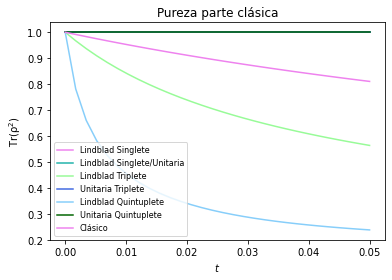

In [20]:
#Pureza clásica

fig, ax = plt.subplots()
ax.plot(time,ρ2cTrazaLindbladianaSinglete,label="Lindblad Singlete",color='violet')
ax.plot(time,ρ2cTrazaUnitariaSinglete,label="Lindblad Singlete/Unitaria",color='lightseagreen')

ax.plot(time,ρ2cTrazaLindbladianaTriplete,label="Lindblad Triplete",color='palegreen')
ax.plot(time,ρ2cTrazaUnitariaTriplete,label="Unitaria Triplete",color='royalblue')

ax.plot(time,ρ2cTrazaLindbladianaQuintuplete,label="Lindblad Quintuplete",color='lightskyblue')
ax.plot(time,ρ2cTrazaUnitariaQuintuplete,label="Unitaria Quintuplete",color='darkgreen')

ax.plot(time,Traza2Clasica,label="Clásico",color='violet')

ax.set_xlabel("$t$")
ax.set_ylabel("Tr(ρ$^2$)")
ax.set_title('Pureza parte clásica')
ax.legend(loc='lower left',ncol=1,fontsize=8)

#plt.savefig("./Graficas/ejemplo2/PurezaClasica_2")
plt.show()